KNN is a non-parametric supervised learning algorithm, which means that it doesn't assume anything about the underlying data.

In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data.shape

(150, 4)

In [6]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,
                                                 stratify= iris.target,
                                                 test_size=0.3,random_state=123
                                                )

In [7]:
collections.Counter(y_train)

Counter({1: 35, 0: 35, 2: 35})

In [8]:
#Normalise the feature values
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
#design the model
model = KNeighborsClassifier(n_neighbors=5)
#train the model
model.fit(X_train,y_train)
#predicted results based on the test dataset
y_pred = model.predict(X_test)

In [10]:
#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9556


In [11]:
# f1 score
# F1 = 2 * (precision * recall) / (precision + recall)
# precision = the number of true positives over the number of true positives plus the number of false positives 
# recall = the number of true positives over the number of true positives plus the number of false negatives
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(f1_score)

[1.         0.92857143 0.9375    ]


In [12]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]


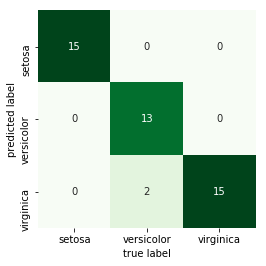

In [13]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [14]:
np.mean(y_pred != y_test)

0.044444444444444446

In [15]:
np.sum(y_pred != y_test) / len(y_test)

0.044444444444444446

In [16]:
acc_list = []
for k in range(1,30):
    #design the model
    model = KNeighborsClassifier(n_neighbors=k)
    #train the model
    model.fit(X_train,y_train)
    #predicted results based on the test dataset
    y_pred = model.predict(X_test)
    #accuracy
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_list.append(acc)

In [17]:
np.argmax(acc_list)

5

In [18]:
# k that maximizes the accuracy
list(range(1,30))[np.argmax(acc_list)]

6

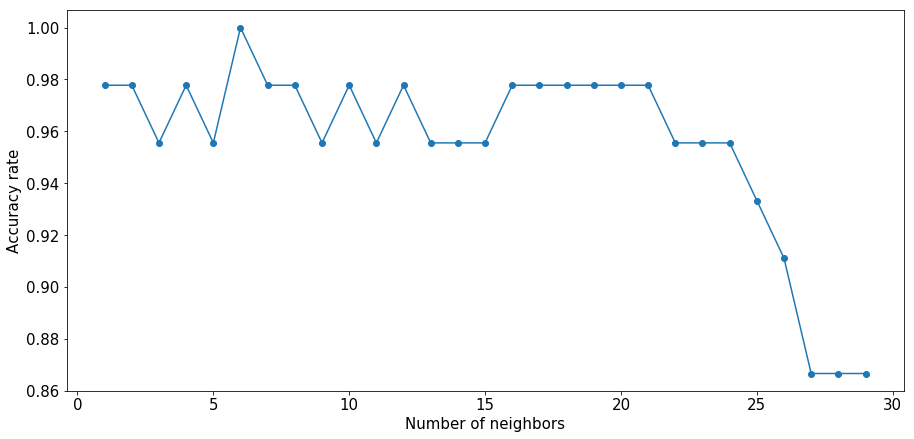

In [19]:
fig,ax = plt.subplots(figsize=(15,7))
ax.plot(range(1,30),
        acc_list,
        marker='o',
        label='Accuracy'
       )
plt.xticks(fontsize=15);
plt.xlabel('Number of neighbors',fontsize=15);
plt.yticks(fontsize=15);
plt.ylabel('Accuracy rate',fontsize=15);

### KNN with PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
X = iris.data
pca = PCA()
X_new = pca.fit_transform(X)

In [22]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [23]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(X_new,iris.target,
                                                 stratify= iris.target,
                                                 test_size=0.3,random_state=123
                                                )

In [24]:
#Normalise the feature values
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
#design the model
knn_pca = KNeighborsClassifier(n_neighbors=5)
#train the model
knn_pca.fit(X_train,y_train)
#predicted results based on the test dataset
y_pred = knn_pca.predict(X_test)

In [26]:
#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9556


In [27]:
# f1 score
# F1 = 2 * (precision * recall) / (precision + recall)
# precision = the number of true positives over the number of true positives plus the number of false positives 
# recall = the number of true positives over the number of true positives plus the number of false negatives
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(f1_score)

[1.         0.92857143 0.9375    ]


In [28]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[15  0  0]
 [ 0 13  2]
 [ 0  0 15]]
